In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv.')

# Q4

In [3]:
#Looking at top 5 rows of dataframe
gdp_df

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN
...,...,...,...,...
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN


# Q5

In [4]:
#Rows = 7662, Columns = 4
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


# Q6

In [5]:
gdp_df_less = gdp_df.drop('Value Footnotes', axis=1)

In [6]:
gdp_df_less

,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [7]:
gdp_df_clean = gdp_df_less.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'})

In [8]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


In [9]:
gdp_df_clean['Year'].agg(['min', 'max'])

min    1990
max    2022
Name: Year, dtype: int64

gdp_df_clean['Country'].groupby(value_counts(sort=True))

In [10]:
gdp_df_clean.sort_values('Year', ascending=False)

,Country,Year,GDP_Per_Capita
4113,Lower middle income,2022,7127.774670
1704,Dominica,2022,11495.130423
1314,Chile,2022,25886.121356
3995,Libya,2022,19796.587498
4921,Nauru,2022,11109.803012
...,...,...,...
1627,Czechia,1990,23585.181494
1660,Dem. Rep. Congo,1990,1750.169739
6412,Spain,1990,27543.221532
1693,Denmark,1990,39027.978737


n = 0
m = 0
for year_count in countries_year_count['count']:
    if year_count == num_years:
        n += 1
    else:
        m += 1
print(str(n) + ' have data for all years')
print(str(m) + ' do not have data for all years')

In [11]:
gdp_df_clean['Year'].agg(['min', 'max'])
num_years = gdp_df_clean['Year'].max() +1  - gdp_df_clean['Year'].min()
print('Total number of years: ' + str(num_years))

Total number of years: 33


In [12]:
countries_year_count = gdp_df_clean['Country'].value_counts().reset_index()

In [13]:
countries_all_years = pd.array(countries_year_count[countries_year_count['count'] == num_years]['Country'])
countries_missing_years = pd.array(countries_year_count[countries_year_count['count'] != num_years]['Country'])

In [14]:
len(countries_all_years)

202

In [15]:
len(countries_missing_years)

40

In [16]:
countries_missing_years

<PandasArray>
[                  'Hungary',                   'Lebanon',
                     'Aruba',                     'Tonga',
                    'Bhutan',           'Slovak Republic',
                    'Kuwait',              'Turkmenistan',
                  'Cambodia',        'West Bank and Gaza',
    'Bosnia and Herzegovina',                    'Latvia',
                    'Israel',                   'Estonia',
                    'Serbia',                 'Lithuania',
                   'Iceland',                   'Moldova',
                  'Maldives',                   'Croatia',
                  'Slovenia',              'Small states',
                'Montenegro',                'San Marino',
                     'Libya',               'Timor-Leste',
                   'Liberia',        'Other small states',
                     'Qatar',                     'Palau',
                  'CuraÃ§ao',   'SÃ£o TomÃ© and Principe',
               'Afghanistan',             

# Question 8

In [17]:
gdp_df_clean

,Country,Year,GDP_Per_Capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111
...,...,...,...
7657,Zimbabwe,1994,2670.106615
7658,Zimbabwe,1993,2458.783255
7659,Zimbabwe,1992,2468.278257
7660,Zimbabwe,1991,2781.787843


C:\Users\timot\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


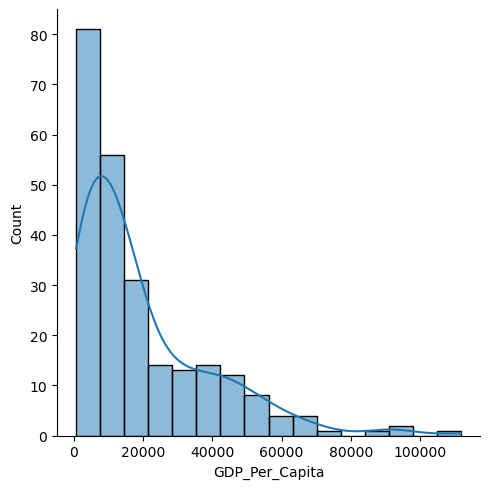

In [18]:
gdp_2020 = gdp_df_clean[gdp_df_clean['Year'] == 2020]
sns.displot( data=gdp_2020["GDP_Per_Capita"], kde=True )

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

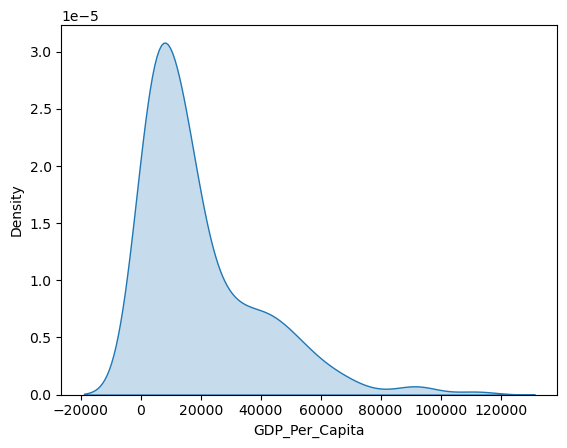

In [19]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], fill=True)

<Axes: ylabel='GDP_Per_Capita'>

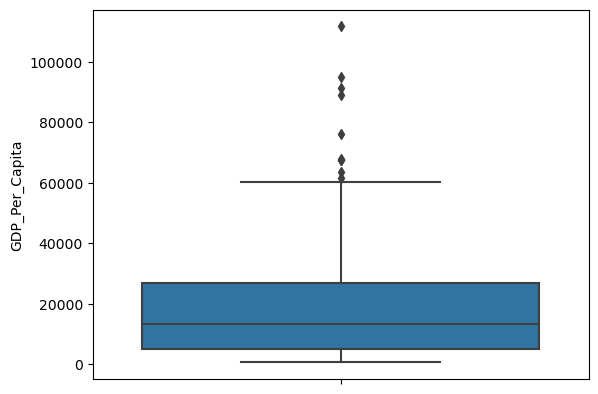

In [24]:
sns.boxplot( y=gdp_2020["GDP_Per_Capita"])

<Axes: ylabel='GDP_Per_Capita'>

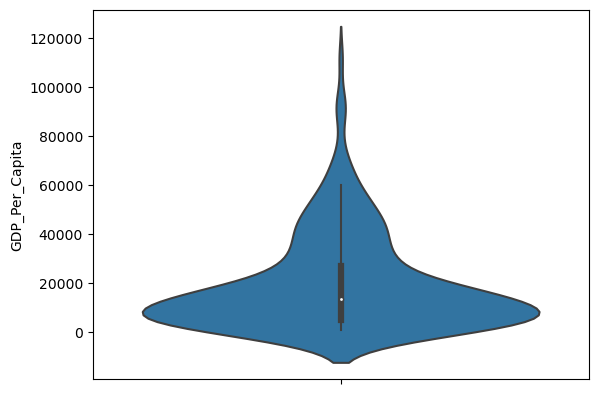

In [25]:
sns.violinplot(y=gdp_2020["GDP_Per_Capita"])

# Question 9

In [35]:
round(gdp_2020["GDP_Per_Capita"].median(), 2)

13358.0

# Question 10

In [50]:
gdp_decades = gdp_df_clean[gdp_df_clean['Year'].isin([1990, 2000, 2010, 2020])]

In [51]:
gdp_decades

,Country,Year,GDP_Per_Capita
1,Afghanistan,2020,1968.341002
11,Afghanistan,2010,2026.163818
22,Africa Eastern and Southern,2020,3455.023119
32,Africa Eastern and Southern,2010,3513.315920
42,Africa Eastern and Southern,2000,2897.140841
...,...,...,...
7628,Zambia,1990,2290.039226
7631,Zimbabwe,2020,1990.319419
7641,Zimbabwe,2010,1799.540233
7651,Zimbabwe,2000,2750.601236


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

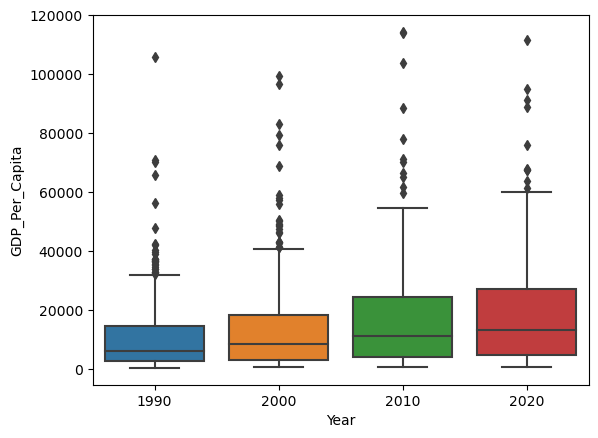

In [57]:
sns.boxplot( x=gdp_decades["Year"], y=gdp_decades["GDP_Per_Capita"] )

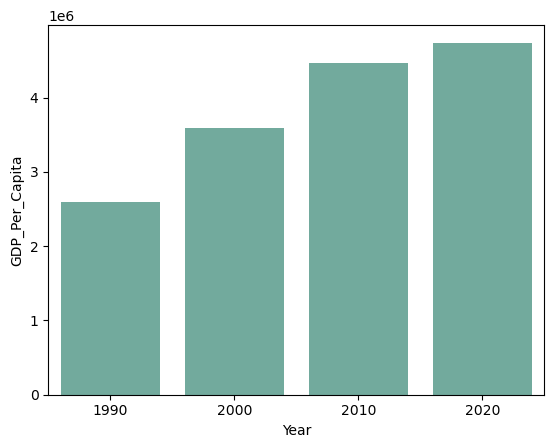

In [56]:
sns.barplot(
    y="GDP_Per_Capita",
    x="Year",
    data=gdp_decades,
    estimator=sum, 
    errorbar=None, 
    color='#69b3a2');

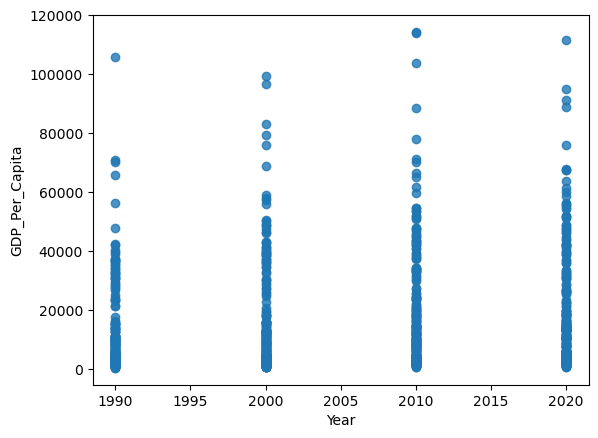

In [58]:
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    fit_reg=False
)
plt.show()

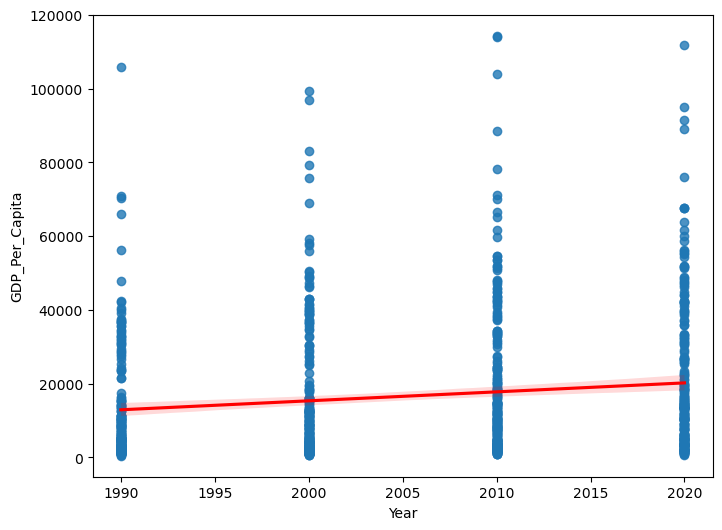

In [60]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(
    x=gdp_decades["Year"],
    y=gdp_decades["GDP_Per_Capita"],
    line_kws={"color": "r"},
    ax=ax
)
plt.show()

# Question 11